In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2

In [5]:
X = []
y = []


In [6]:
# len(X)

In [7]:
ds = pd.read_csv('./charTrainingSet/A_Z Handwritten Data.csv')

In [8]:
ds.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
arr = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

In [10]:
len(arr)

26

In [11]:
np.max(ds.iloc[:,0])

25

In [12]:
for i,row in ds.iterrows(): 
    img = np.array(row[1:]).reshape([28,28])
    # print(row[1:].shape)
    # print(row[0])
    # plt.imshow(img)
    # plt.show()
    X.append(img)
    y.append(arr[row[0]])

In [13]:
# data_augmentation = tf.keras.Sequential([
#   layers.RandomRotation(0.2),
# ])

In [14]:
# X[0].size
# X[0].ndim
# X[0].shape

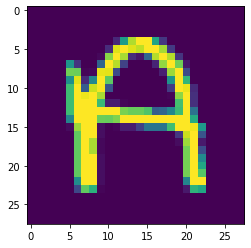

In [15]:
plt.imshow(X[100])

In [16]:
# print(y[100])

In [17]:
from sklearn.utils import shuffle

In [18]:
X,y = shuffle(X, y, random_state = 0)

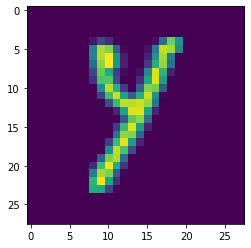

In [19]:
plt.imshow(X[0])

In [20]:
# %pip install tensorflow

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(arr))
y_enc = label_encoder.transform(y)

In [22]:
from tensorflow.keras.utils import to_categorical
y_enc = to_categorical(y_enc, num_classes=len(np.unique(y_enc)))

In [23]:
y[0]

'Y'

In [24]:
label_encoder.inverse_transform([19])

array(['T'], dtype='<U1')

In [25]:
y_enc[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test, y_train,y_test = train_test_split(X,y_enc,test_size=0.3,random_state=0)

In [28]:
X_train[0].shape

(28, 28)

In [29]:
input_size = 784

In [30]:
# X_train = np.reshape(X_train, [-1, input_size])
X_train = np.array(X_train).astype('float32') / 255
# X_test = np.reshape(X_test, [-1, input_size])
X_test = np.array(X_test).astype('float32') / 255

In [31]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train[0].shape

(28, 28, 1)

In [32]:
X[0].flatten().shape

(784,)

In [33]:
X_train[0].shape

(28, 28, 1)

In [34]:
import tensorflow as tf

In [43]:
batch_size = 128
hidden_units = 256
dropout = 0.70
num_labels = 26

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import layers

In [45]:
model = Sequential(
    [
        Input(shape=X_train[0].shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [46]:
 %pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [47]:
#plot_model(model, show_shapes=True)

In [48]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [50]:
model.fit(X_train, y_train,batch_size=128, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
2037/2037 [==============================] - 92s 45ms/step - loss: 0.3218 - accuracy: 0.9089 - val_loss: 0.0785 - val_accuracy: 0.9777
Epoch 2/5
2037/2037 [==============================] - 90s 44ms/step - loss: 0.1297 - accuracy: 0.9639 - val_loss: 0.0605 - val_accuracy: 0.9830
Epoch 3/5
2037/2037 [==============================] - 89s 44ms/step - loss: 0.1018 - accuracy: 0.9718 - val_loss: 0.0508 - val_accuracy: 0.9857
Epoch 4/5
2037/2037 [==============================] - 91s 45ms/step - loss: 0.0841 - accuracy: 0.9763 - val_loss: 0.0453 - val_accuracy: 0.9876
Epoch 5/5
2037/2037 [==============================] - 92s 45ms/step - loss: 0.0725 - accuracy: 0.9795 - val_loss: 0.0414 - val_accuracy: 0.9891


In [51]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

873/873 [==============================] - 9s 10ms/step - loss: 0.0414 - accuracy: 0.9891


In [52]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [53]:
y_pred[0]

17

In [54]:
y_test = np.argmax(y_test, axis=1)

In [55]:
y_test[0]

17

In [56]:
np.unique(y)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')

In [57]:
label_encoder.inverse_transform(y_pred) 

array(['R', 'O', 'N', ..., 'L', 'Y', 'X'], dtype='<U1')

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=np.unique(y)))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99      4140
           B       0.98      0.99      0.99      2592
           C       0.99      0.99      0.99      6989
           D       0.95      0.97      0.96      2995
           E       1.00      0.98      0.99      3486
           F       0.96      0.98      0.97       359
           G       0.99      0.97      0.98      1726
           H       0.99      0.97      0.98      2123
           I       0.98      0.98      0.98       334
           J       0.98      0.97      0.97      2551
           K       0.97      0.98      0.97      1675
           L       0.98      0.99      0.98      3460
           M       0.99      1.00      0.99      3714
           N       0.99      0.99      0.99      5621
           O       0.99      0.99      0.99     17423
           P       1.00      0.99      0.99      5752
           Q       0.99      0.98      0.98      1786
           R       0.99    

In [59]:
test_path = "./pytest/src/assets/charTrainingSet"

In [60]:
test_images=os.listdir(test_path)

In [61]:
test_images[0]

'group1-shard1of1.bin'

In [62]:
test_img = cv2.imread(test_path+"/"+test_images[0],cv2.IMREAD_GRAYSCALE)

In [64]:
%pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [65]:
model.trainable=False

In [66]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model ,os.getcwd() + "../src/assets/charTrainingSet")

: 